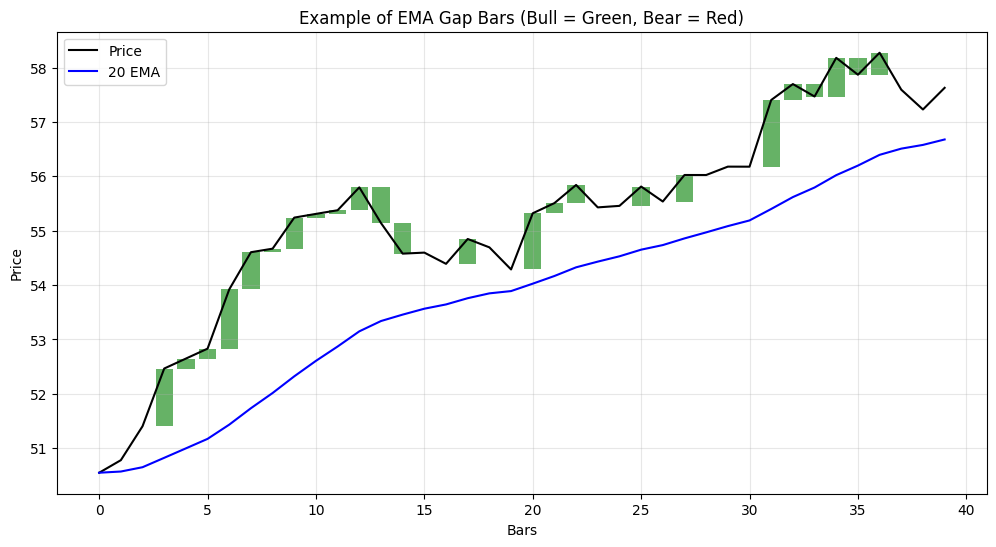

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample price data
np.random.seed(42)
bars = 40
price = np.cumsum(np.random.randn(bars) * 0.5 + 0.3) + 50

# Calculate 20-period EMA
ema_period = 20
ema = []
multiplier = 2 / (ema_period + 1)
for i, p in enumerate(price):
    if i == 0:
        ema.append(p)
    else:
        ema.append((p - ema[-1]) * multiplier + ema[-1])

# Create plot
plt.figure(figsize=(12,6))
plt.plot(price, label="Price", color="black")
plt.plot(ema, label="20 EMA", color="blue", linewidth=1.5)

# Highlight EMA gap bars
for i in range(1, bars):
    if price[i] > ema[i] * 1.02:  # Bull EMA gap bar (2% above EMA)
        plt.bar(i, price[i] - price[i-1], bottom=price[i-1], color="green", alpha=0.6)
    elif price[i] < ema[i] * 0.98:  # Bear EMA gap bar (2% below EMA)
        plt.bar(i, price[i] - price[i-1], bottom=price[i-1], color="red", alpha=0.6)

plt.title("Example of EMA Gap Bars (Bull = Green, Bear = Red)")
plt.xlabel("Bars")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
